<a href="https://colab.research.google.com/github/scadriano/lia1-2023-1/blob/main/Aula09-CarregamentoProcessamentoAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas

- Biblioteca librosa: https://librosa.org/doc/latest/index.html

In [1]:
import numpy as np
import time
from datetime import datetime
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,6)
from IPython.display import HTML, Audio
import librosa  
!pip install librosa==0.8.1
import librosa.display as ld
import seaborn as sn
sn.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
librosa.__version__

'0.8.1'

# Carregamento de arquivos de áudio 


In [3]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [4]:
# Formato OGG: https://pt.wikipedia.org/wiki/Ogg
filename = librosa.util.example_audio_file()
#filename = librosa.ex('trumpet')
mono_data, sample_rate = librosa.load(filename, duration = 60)

In [5]:
print('Vetor: ', mono_data)

Vetor:  [0.         0.         0.         ... 0.00516269 0.00471656 0.00445064]


In [6]:
print('Canais: ', mono_data.shape)

Canais:  (1323000,)


In [7]:
print('Número total de amostras: ', mono_data.shape[0])

Número total de amostras:  1323000


In [8]:
print('Taxa de amostragem: ', sample_rate)

Taxa de amostragem:  22050


In [9]:
22050 * 60

1323000

In [10]:
print('Duração do áudio: ', len(mono_data) / sample_rate)

Duração do áudio:  60.0


In [11]:
print('Duração do áudio: ', librosa.get_duration(mono_data))

Duração do áudio:  60.0


In [12]:
Audio(data = mono_data, rate = sample_rate)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
filename = librosa.util.example_audio_file()
stereo_data, sample_rate = librosa.load(filename, mono = False, duration = 60)

In [14]:
stereo_data

array([[ 0.        ,  0.        ,  0.        , ...,  0.01720249,
         0.01767251,  0.01929992],
       [ 0.        ,  0.        ,  0.        , ..., -0.0068771 ,
        -0.00823939, -0.01039863]], dtype=float32)

In [15]:
stereo_data.shape

(2, 1323000)

In [16]:
print('Canais: ', stereo_data.shape[0])
print('Taxa de amostragem: ', sample_rate)
print('Duração: ', librosa.get_duration(stereo_data))

Canais:  2
Taxa de amostragem:  22050
Duração:  60.0


In [17]:
Audio(data = stereo_data, rate = sample_rate)

Output hidden; open in https://colab.research.google.com to view.

# Taxa de amostragem

- Algumas taxas de amostragem podem ser encontradas em:
[Sampling (signal processing)](https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Sampling_rate)

In [18]:
data, sample_rate = librosa.load(filename, duration = 60, sr = 8000)
print('Taxa de amostragem: ', sample_rate)
print('Amostras: ', data)
print('Quantidade de amostras: ', len(data))

Taxa de amostragem:  8000
Amostras:  [0.         0.         0.         ... 0.00595358 0.00583638 0.00533468]
Quantidade de amostras:  480000


In [19]:
Audio(data = data, rate = sample_rate)

# Tipos de reamostragem

 * `res_type = 'kaiser_best'`: reamostragem de alta qualidade, demora mais para carregar os arquivos de áudio, porém com uma qualidade de reamostragem melhor;
 * `res_type = 'kaiser_fast'`: método de reamostragem rápida;
 * `res_type = 'scipy'`: método de Fourier.
  * [Transformada de Fourier](https://pt.wikipedia.org/wiki/Transformada_de_Fourier)
 * `res_type = 'polyphase'`: método de reamostragem por filtragem polifásica (rápido);
  * [Polyphase Filters](https://www.dsprelated.com/showarticle/191.php#:~:text=Polyphase%20filtering%20is%20a%20computationally,filterbanks%20using%20the%20same%20theories.)


In [20]:
filename = librosa.util.example_audio_file()

start = time.time()
data, sample_rate = librosa.load(filename, duration = 60, res_type = 'kaiser_best')
best = time.time() - start

start = time.time()
data, sample_rate = librosa.load(filename, duration = 60, res_type = 'kaiser_fast')
fast = time.time() - start

start = time.time()
data, sample_rate = librosa.load(filename, duration = 60, res_type = 'scipy')
scipy = time.time() - start

start = time.time()
data, sample_rate = librosa.load(filename, duration = 60, res_type = 'polyphase')
poly = time.time() - start

In [21]:
print('Tempo de carregamento por tipo de reamostragem')
print('Kaiser best:', best)
print('Kaiser fast:', fast)
print('Scipy:', scipy)
print('Poly:', poly)

Tempo de carregamento por tipo de reamostragem
Kaiser best: 2.708632469177246
Kaiser fast: 1.0007402896881104
Scipy: 0.348879337310791
Poly: 0.35121726989746094


# Separação harmônico-percussiva


In [22]:
filename = librosa.ex('nutcracker')
y, sr = librosa.load(filename)
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [23]:
print('Taxa de amostragem: ', sr)
print('Quantidade de amostras: ', len(y))
print('Duração: ', librosa.get_duration(y))
print('Canais: ', y.shape)

Taxa de amostragem:  22050
Quantidade de amostras:  2643264
Duração:  119.87591836734694
Canais:  (2643264,)


In [ ]:
print('Som harmônico')
Audio(data = y_harmonic, rate = sr)

Som harmônico


In [ ]:
print('Som percussivo')
Audio(data = y_percussive, rate = sr)

# Detecção de início e sintetização de *click*

In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))

In [ ]:
Audio(data = y, rate = sr)

In [ ]:
# https://librosa.org/doc/main/generated/librosa.onset.onset_strength.html
onset_env = librosa.onset.onset_strength(y = y, sr = sr, max_size = 5)

In [ ]:
onset_env.shape, type(onset_env)

((230,), numpy.ndarray)

In [ ]:
times = librosa.times_like(onset_env, sr = sr)

In [ ]:
times.shape, type(times)

((230,), numpy.ndarray)

In [ ]:
onset_frames = librosa.onset.onset_detect(onset_envelope = onset_env, sr = sr)

In [ ]:
onset_frames

array([  3,  11,  26,  40,  48,  61,  88, 102, 110])

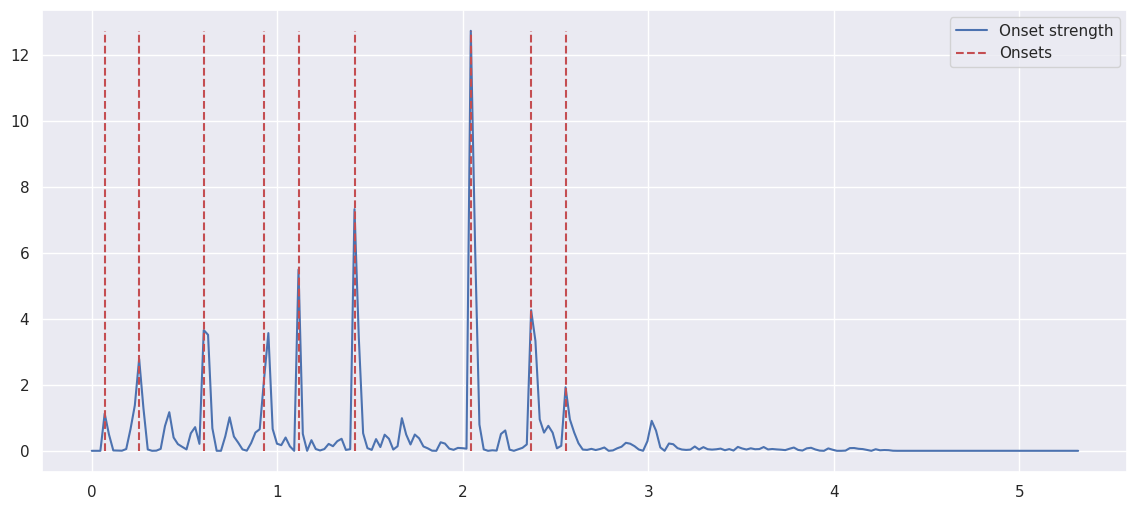

In [ ]:
plt.plot(times, onset_env, label = 'Onset strength')
plt.vlines(times[onset_frames], 0, onset_env.max(), color = 'r', linestyle = '--', label = 'Onsets')
plt.legend()

In [ ]:
onset_times = librosa.onset.onset_detect(onset_envelope = onset_env, sr = sr, units = 'time')
y_clicks = librosa.clicks(times = onset_times, length = len(y), sr = sr)
Audio(data = y + y_clicks, rate = sr)

# Visualizando o gráfico de onda (Wave Plots)

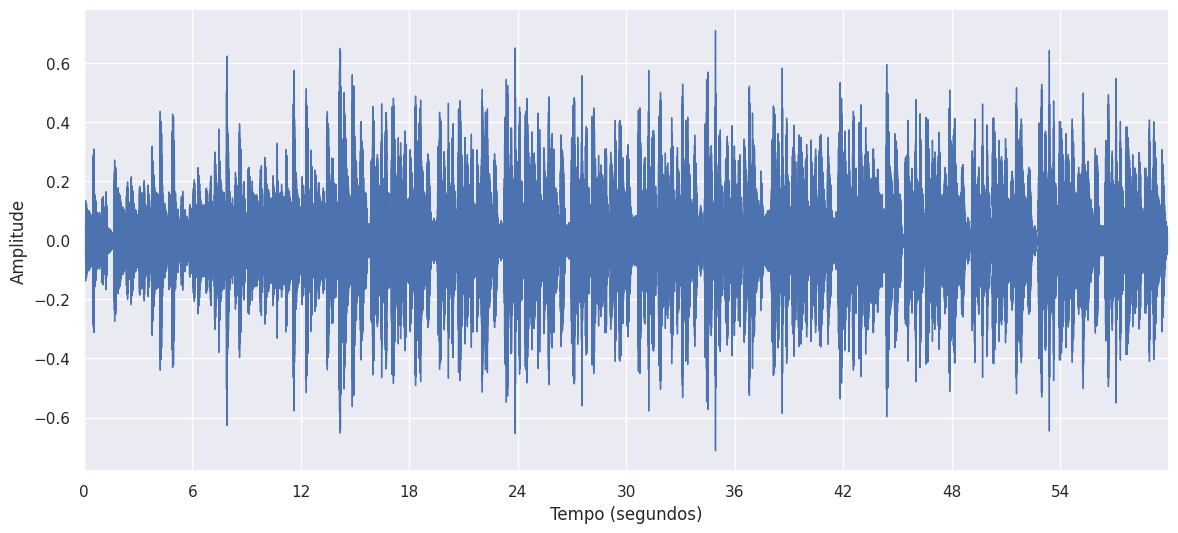

In [ ]:
ld.waveplot(y = mono_data, sr = sample_rate)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.show()

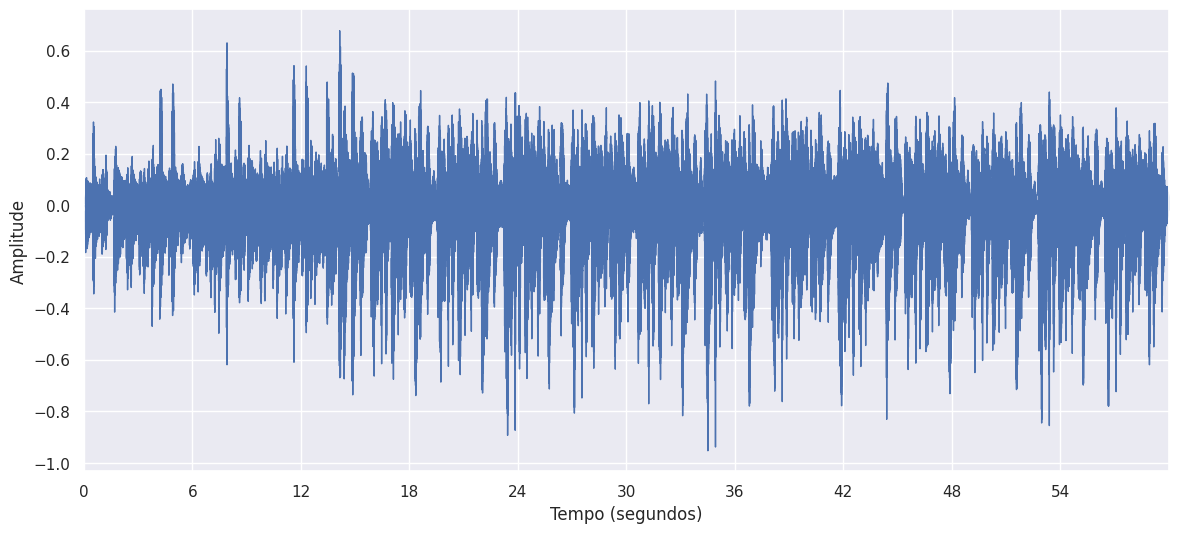

In [ ]:
ld.waveplot(y = stereo_data, sr = sample_rate)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Amplitude')
plt.show()

# Noções básicas sobre a Transformada de Fourier (FT), STFT, MFCC

## Transformada de Fourier

*	FT (*Fourier Transform*) é uma técnica matemática para transformar nossa visão do sinal baseada em tempo para baseada em frequência.
*	Um sinal de áudio é um sinal complexo composto de múltiplas 'ondas sonoras de frequência única' que viajam juntas como uma perturbação (mudança de pressão) no meio. Quando o som é gravado, capturamos apenas as amplitudes resultantes dessas múltiplas ondas. 
*	FT não fornece apenas as frequências presentes no sinal, mas também a magnitude de cada frequência presente no sinal.

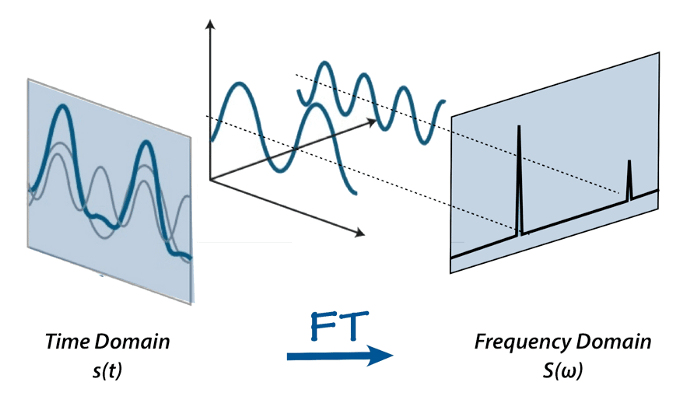

Desvantagem:
 * Na transformação para o domínio da frequência, a informação do tempo é perdida. Ao olhar para uma transformada de Fourier de um sinal, é impossível dizer quando um determinado evento ocorreu.

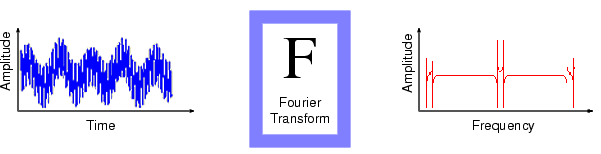


## Transformadas de Fourier de Curta Duração (*STFT - Short-Time Fourier Transforms*)

 
 * Os sinais musicais são altamente **não estacionários**, ou seja, suas estatísticas mudam com o tempo. Não faria sentido calcular uma única transformada de Fourier em uma música inteira de 10 minutos.
 * Dennis Gabor (1946) adaptou a transformada de Fourier para analisar apenas uma pequena seção do sinal de cada vez - uma técnica chamada janelamento do sinal. A adaptação de Gabor, chamada de Short-Time Fourier Transform (STFT), mapeia um sinal em uma função bidimensional de tempo e frequência.
 * Ele fornece algumas informações sobre quando e em quais frequências um evento de sinal ocorre. No entanto, você só pode obter essas informações com precisão limitada, e essa precisão é determinada pelo tamanho da janela.
 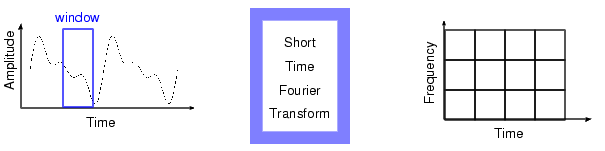
 * Janela é uma função que "quebra" o sinal de áudio em quadros menores (janelas), estes quadros deslizam/saltam da esquerda para a direita com um comprimento de salto específico para nos fornecer os valores do domínio da frequência. 
 * Assim, a STFT é uma forma de representação tempo-frequência para uma dada função, ao contrário da transformada de Fourier, que é uma representação apenas em frequência.

Desvantagem:
 * Uma vez que escolhemos um tamanho específico para a janela de tempo, essa janela é a mesma para todas as frequências. Muitos sinais requerem uma abordagem mais flexível -- uma onde podemos variar o tamanho da janela para determinar com mais precisão o tempo ou a frequência.

Fonte: 
 * [Transformada de Fourier de curto termo](https://pt.wikipedia.org/wiki/Transformada_de_Fourier_de_curto_termo)
 * [Análise de Fourier de Curta Duração](http://matlab.izmiran.ru/help/toolbox/wavelet/ch01_in9.html)



### STFT com Librosa


In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))
print('Duração: ', len(y) / sr)
print('Quadros/amostras: ', len(y))

Duração:  5.333378684807256
Quadros/amostras:  117601


 * Conforme observamos acima, este é um clipe de áudio de 5.33 segundos e não podemos passar todo o áudio para a função FFT de uma só vez. Isso será demais para o cálculo. Portanto, precisamos dividir os clipes de áudio em várias janelas de comprimento de quadro constante e processá-los cumulativamente. Chamamos esse comprimento de '*window length (
comprimento da janela)*'.

 * Por ser um arquivo de áudio, precisamos que o processamento seja contínuo, então deixamos alguns quadros de janelas subsequentes se sobreporem e a contagem real única de quadros processados ​​por janela é conhecida como '*hop length (comprimento do salto)*'.


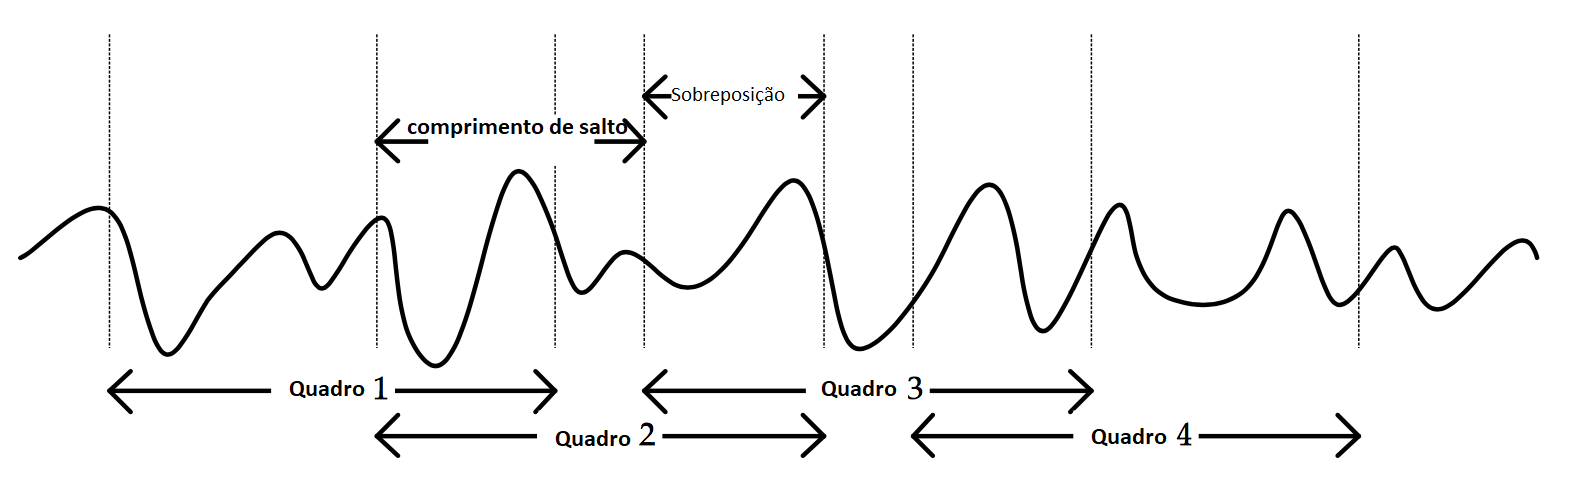
Cada janela contém 'comprimento de salto' + 'janela de sobreposição' número de quadros presentes.

 * A janela de um determinado comprimento (número de FFT) desliza sobre o sinal de áudio 1d, ou seja, ele analisa um segmento (ou quadro) mais curto de cada vez, calcula recursos para este segmento e passa para o próximo segmento.
 * Esses segmentos geralmente se sobrepõem. A distância entre dois desses segmentos é denominada *comprimento de salto* e é especificada em número de amostras. Pode ser idêntico a *número de FFT*, mas muitas vezes o *comprimento de salto* é metade ou até mesmo um quarto de *número de FFT*. 
 * Ele permite que você controle a resolução temporal de seus recursos.

Fonte: [Audio Data Processing — Feature Extraction — Essential Science & Concepts behind them — Part 2](https://medium.com/analytics-vidhya/audio-data-processing-feature-extraction-essential-science-concepts-behind-them-part-2-9c738e6a7f99)


In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))
# No processamento de fala, o valor recomendado é 512, correspondendo a 23 milissegundos a uma taxa 
# de amostragem de 22.050 Hz
hop_length = 512 # comprimento do salto
n_fft = 2048 # tamanho do quadro

X = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
X.shape

(1025, 230)

**Também podemos dizer que este STFT possui 1025 bins de frequência e 230 frames no tempo.**

'1025' corresponde ao número de FFT:
 * (1 + n_fft/2) = (1 + (2048/2))
  * (1 + n_fft/2) = (1 + 1024)
    * (1 + n_fft/2) = 1025

'230' corresponde ao comprimento do salto (total de quadros/hop_length),  arrendondando para a potência mais próxima de 2:
 * (quadros / hop_length) = (117601 / 512)
  * (quadros / hop_length) = 229.689

In [ ]:
result_n_fft = (n_fft / 2) + 1
math.ceil(result_n_fft)

1025

In [ ]:
math.ceil(len(y) / hop_length)

230

In [ ]:
print('n_fft em segundos: ', n_fft / sr)

n_fft em segundos:  0.09287981859410431


In [ ]:
print('Hop length em segundos: ', hop_length / sr)

Hop length em segundos:  0.023219954648526078


### Visualizando o espectrograma de STFT

 * No processamento de música, muitas vezes nos preocupamos apenas com a magnitude espectral e não com o conteúdo da fase.

 * O espectrograma mostra a intensidade das frequências ao longo do tempo. 

 * A percepção humana da intensidade do som é logarítmica por natureza. Portanto, muitas vezes estamos interessados ​​na amplitude logarítmica, por isso ao converter para decibéis (dB) a escala se torna logarítmica.

  * A intensidade das cores quando isso é plotado corresponde mais de perto ao que ouvimos do que se fosse usada uma escala linear.

Em resumo o algoritmo para geração de um espectrograma trabalha desta maneira:
1. Obter sinal de áudio
2. Separar o sinal em quadros/janelas
3. Para cada quadro calcular a transformada de Fourier
4. Criar matriz cujas colunas são as transformações
5. Traçar o mapa de calor desta matriz 


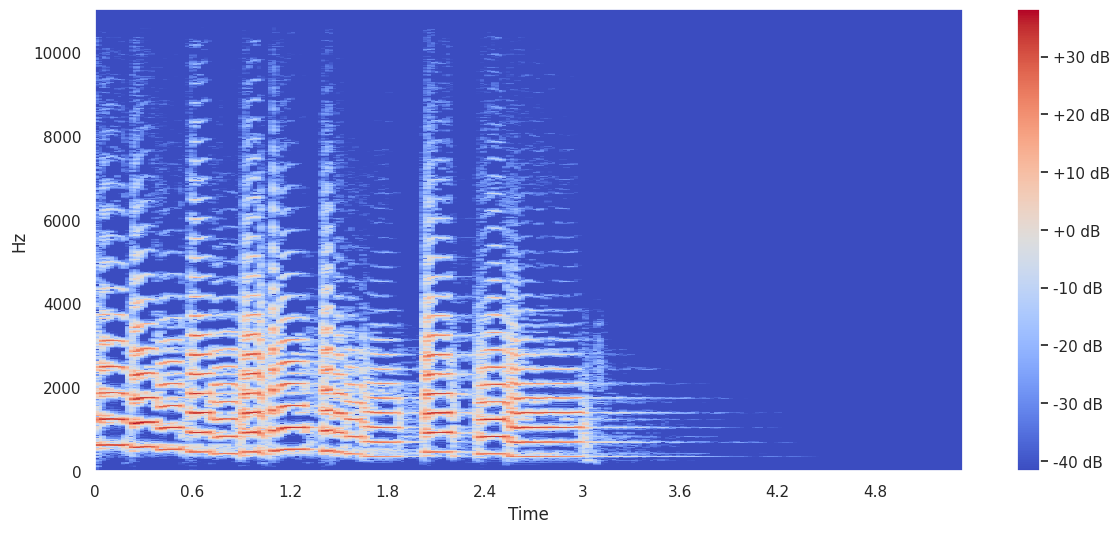

In [ ]:
# Linear
S = librosa.amplitude_to_db(abs(X))
ld.specshow(S, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [ ]:
# Logarítmica
d = librosa.stft(mono_data)
D = librosa.amplitude_to_db(abs(d))
fig, ax = plt.subplots(2, 1)
img = ld.specshow(D, y_axis='linear', x_axis = 's', sr = sample_rate, ax = ax[0])
ax[0].set(title = 'Espectrograma de potência de frequência linear')
ax[0].label_outer()
ld.specshow(D, y_axis = 'log', x_axis='s', sr = sample_rate, ax = ax[1])
ax[1].set(title = 'Espectrograma de potência de frequência logarítmica')
ax[1].label_outer()
fig.colorbar(img, ax = ax, format='%+2.f dB')

## Coeficientes Cepstral de Frequência Mel (MFCC)
### A escala de mel


 * A escala mel é uma escala de transformação não linear onde transforma a faixa de frequência do áudio em uma faixa de valor diferente - cuja diferença soaria idêntica ao usuário final, independentemente dos valores.

 * Em outras palavras, a ideia central desta transformação é que sons de igual distância na Escala Mel são percebidos como sendo de igual distância para os humanos. 

 * Como vimos nos tópicos anteriores, o alcance da audição humana é apenas entre 20Hz-20KHz.

 * A percepção humana de ouvir a diferença entre a onda sonora de '100 Hz' e '200 Hz' é muito maior em comparação com a diferença de identificação entre '10100 Hz' e '10200Hz', embora a diferença no valor de Hz seja a mesma, ou seja, é muito mais difícil para os humanos serem capazes de diferenciar entre frequências mais altas e mais fácil para frequências mais baixas.

 * **É isso que torna a Escala de Mel fundamental em aplicações de Machine Learning para áudio, pois imita nossa própria percepção de som.**

A fórmula para transformação da escala Hertz para escala Mel é a seguinte:
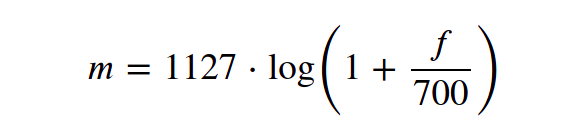

Fonte: 
 * [Learning from Audio: The Mel Scale, Mel Spectrograms, and Mel Frequency Cepstral Coefficients](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8)
 * [Audio Data Processing — Feature Extraction — Essential Science & Concepts behind them — Part 2](https://medium.com/analytics-vidhya/audio-data-processing-feature-extraction-essential-science-concepts-behind-them-part-2-9c738e6a7f99)


### Visualizando a relação entre Hertz e Mels

In [ ]:
def freq_to_mel(f):
  return 1127 * math.log(1 + (f/700))

In [ ]:
mel = np.vectorize(freq_to_mel)

In [ ]:
Hz = np.linspace(0, 1e4) # 0 até 10.000 Hz
print(Hz)

In [ ]:
Mel = mel(Hz)
print(Mel)

In [ ]:
plt.plot(Hz, Mel)
plt.title('Hertz para Mel')
plt.xlabel('Escala Hertz')
plt.ylabel('Escala Mel')

### MFCCs — Mel Frequency Cepstral Co-efficients

 * Coeficiente Cepstral de Frequência Mel (MFCCs) tornaram-se uma maneira popular de representar o som. 
  * Cepstral é a informação da taxa de mudança nas bandas espectrais (transformada de Fourier no sinal de tempo). A ideia básica de como obetmos o cepstral é a seguinte:
    * Aplicamos uma transformada no próprio espectro de frequência;
    * O espectro resultante não está no domínio de frequência, nem no domínio do tempo, por isso [Bogert et al](https://www.fceia.unr.edu.ar/prodivoz/Oppenheim_Schafer_2004.pdf) decidiu chamá-lo de domínio *quefrency*.
    * Este espectro do logaritmo do espectro do sinal de tempo foi denominado cepstrum.
 * As etapas a seguir são um resumo para o calculo do MFCC:
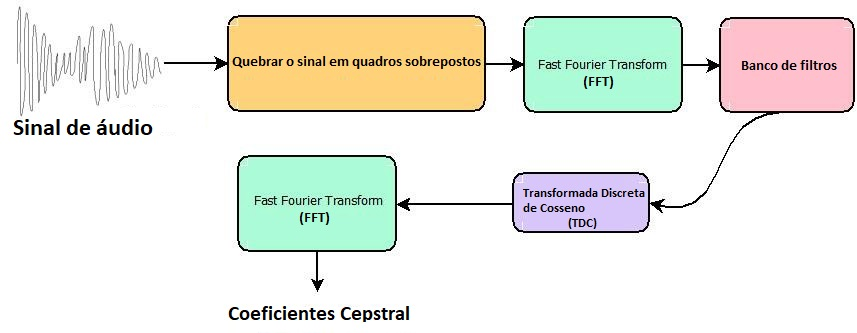
  
 * Aqui, o Banco de Filtros refere-se aos filtros mel (cobrindo a escala mel) e os Coeficientes Cepstral nada mais são do que MFCCs.

Caso deseje aprofundar-se mais nestes conceitos (também para não deixar ainda mais massante esta parte), segue o link de alguns artigos que destalham bastante cada etapa do calculo de MFCC:

[Implementation of audio recognition using mel
frequency cepstrum coefficient and dynamic time
warping in wirama praharsini](https://iopscience.iop.org/article/10.1088/1742-6596/1722/1/012014/pdf)

[The dummy’s guide to MFCC](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)

[From Frequency to Quefrency: A History of the Cepstrum](https://www.fceia.unr.edu.ar/prodivoz/Oppenheim_Schafer_2004.pdf)

[Mel-Frequency Cepstral Coefficients Explained Easily](https://www.youtube.com/watch?v=4_SH2nfbQZ8&ab_channel=ValerioVelardo-TheSoundofAI)







### MFCCs com librosa


In [ ]:
data, sample_rate = librosa.load(librosa.ex('brahms'), duration = 5)
Audio(data, rate = sample_rate)

In [ ]:
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate)
mfccs.shape, type(mfccs)

In [ ]:
len(data)

Nesse exemplo, mfcc calculou 20 MFCCs em 216 quadros de recursos.
 * 20 é o parâmetro padrão do número de MFCCs que irá retornar (também corresponde ao número de linhas no espetrograma).
 * 216 quadros corresponde ao comprimento do salto (total de quadros/hop_length) arrendondando para a potência mais próxima de 2 (também corresponde ao número de colunas no gráfico):

(quadros / hop_length) = (110250 / 512)
(quadros / hop_length) = 215.332

In [ ]:
ld.specshow(mfccs, sr = sample_rate, x_axis = 'time', cmap = 'Spectral')

  * Quanto maior o número de n_mfcc, maior a resolução espectral;
  * Se aumentarmos para 40 MFCCs, podemos perceber que o espectrograma é mais detalhado e preciso.

### Comparativo do espectrograma em decibéis

In [ ]:
data, sample_rate = librosa.load(librosa.ex('fishin'))

mfccs20 = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc=20)
mfccs40 = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc=40)

mfccs20_db = librosa.amplitude_to_db(abs(mfccs20))
mfccs40_db = librosa.amplitude_to_db(abs(mfccs40))

fig, ax = plt.subplots(2, 1)
img = ld.specshow(mfccs20_db, sr = sample_rate, x_axis = 'time', y_axis = 'log', ax=ax[0], cmap = 'Spectral')
ax[0].set(title = '20 MFCCs (dB)')
ax[0].label_outer()
ld.specshow(mfccs40_db, sr = sample_rate, x_axis = 'time', y_axis = 'log', ax=ax[1], cmap = 'Spectral')
ax[1].set(title = '40 MFCCs (dB)')
ax[1].label_outer()
fig.colorbar(img, ax = ax, format='%+2.f dB')

In [ ]:
mfccs20.shape, mfccs40.shape

In [ ]:
mfccs20

In [ ]:
mfccs40

## Aplicando a Normalização Média Cepstral

Também podemos normalizar os recursos MFCCs extraídos de cada arquivo de áudio utilizando a técnica chamada Normalização Média Cepstral (CMN - Cepstral Mean Normalization).
  * Isto reduzirá o ruído e variações que ocorrem nos canais de cada arquivo de áudio, pois as condições do canal são diferentes para cada arquivo;
  * Assim, cada recurso de áudio extraído é padronizado com sua própria média;

Mais detelhes sobre CMN podem ser vistos nestes artigos:
  * [Cepstral mean and variance normalization](https://en.wikipedia.org/wiki/Cepstral_mean_and_variance_normalization)
  * [Parametric Cepstral Mean Normalization for Robust Speech Recognition](https://machinelearning.apple.com/research/parametric-cepstral-mean-normalization-for-robust-speech-recognition)

In [ ]:
data, sample_rate = librosa.load(librosa.ex('fishin'))
mfccs = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc=40)
mfccs.shape

In [ ]:
mfccs_scaled_features = np.mean(mfccs.T, axis = 0)

In [ ]:
mfccs_scaled_features.shape

In [ ]:
mfccs_scaled_features

In [ ]:
plt.plot(mfccs_scaled_features)